# Lectures 10 and 11: Data analysis with `pandas` and `scikit-learn`

One of the strengths of the python language is the amazing collection of packages built on top of the core library. Here we'll learn about two libraries that are useful for "data science". 

`pandas` is a multi-purpose data analysis library built on top of numpy and matplotlib. It's great for analyzing tabular data.

https://pandas.pydata.org/

Some useful introductory `pandas` docs:

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html


`scikit-learn` is a nice library of machine learning tools with a clean and consistent interface. 

http://scikit-learn.org/stable/

Both pandas and scikit-learn are built on top of the core python numeric library `numpy`, so we'll start with a quick intro to `numpy`.

https://numpy.org


# Warmup: indexing into lists

In [4]:
# how do we get the "third" element of a_list, i.e. the 9?
a_list = [2, 7, 9]

a_list[2]

9

In [3]:
# lists can contain other lists. Here's a list made up of two lists:
b_list = [[0, 11, 1], [3, 6, 2]]

# how do we get the "first" list, ie [0, 11, 1] ?
print (b_list[0]) #this is read as "print the first list"


# how do we get the "second" element of the "first" list, i.e. the 11?
print (b_list[0][1]) #this is read as "in the first list, print the second index"

# python expressions can be composed of a complex sequence of operations:
import math
print(math.log((b_list[0][1])**2)) #this is read as "get the second index of the first list, square it, and take the log"



[0, 11, 1]
11
4.795790545596741


# Quick intro to numpy
`numpy` is the foundation on which most of python data analysis is built. It provides highly optimized routines for operating on multidimensional numeric data. The only things we really need to understand at this point are:
* there are things called `numpy` arrays (class `ndarray`)
* we index into arrays like we index into lists, but with multiple indices if there are multiple dimensions
* `numpy` has all sorts of fast numeric operations, so if we are dealing with lots of numeric data we are usually better off getting it into a numpy array than writing `for` loops ourselves. 

In [2]:
# this is how we import numpy
import numpy as np

# do this so that our plots show up in the notebook
# may not be necessary in all environments
#
%matplotlib inline

In [5]:
# we can create a numpy array from a list
# here is a 1-dimensional array of integers

A1 = np.array([0,4,5,6]) #this is a 1-dimensional array of integers

print(A1) #this will print out the 1-dimensional array

print('A1 has data type:', A1.dtype) #A1.dtype will tell you the size (in bits) of your data and the type (e.g. integer, float, string, etc)

print('A1 has shape:', A1.shape) #A1.shape will give you an idea of the dimension of the array

print(A1[2]) # indexing into a 1-D array is like indexing into a list

[0 4 5 6]
A1 has data type: int64
A1 has shape: (4,)
5


In [6]:
# we can also create a 2D array, which we can think of as a list of lists.
# Here we create a 2D array from a list of lists
A2_list = [ [0,3,4], [2,7,1.5] ]
print('A2_list:\n', A2_list) #this prints out the string "A2_list:", indents, then prints the array

A2 = np.array(A2_list)
print('A2:\n', A2) # All the numbers were turned into floats
print('A2 has data type:', A2.dtype) # arrays have a single consistent datatype
print('A2 has shape:', A2.shape) #A2.shape will give you an idea of the dimension of the array


A2_list:
 [[0, 3, 4], [2, 7, 1.5]]
A2:
 [[0.  3.  4. ]
 [2.  7.  1.5]]
A2 has data type: float64
A2 has shape: (2, 3)


In [13]:
# We can think of A2 as being a list of the individual rows
# so this gives us the first row:
print('first row:', A2[0])

# and this gives us the second element of the first row
print('second element of first row:', A2[0][1])

first row: [0. 3. 4.]
second element of first row: 3.0


In [12]:
# To avoid typing all those [][], numpy gives us a shorter way
# of indexing into multidimensional arrays:
print('The element in row 0, column 1 is',A2[0][1]) # old way, as a "list of lists"
print('The element in row 0, column 1 is',A2[0,1]) # new way, with a comma
print('The element in row 1, column 2 is',A2[1,2])

# we can take entire rows or columns by using : instead of a number
print('Row 0 of A2 is', A2[0,:])
print('Column 1 of A2 is', A2[:,1])

# we don't have to take the entire row:
print('The first two elements of row 1 of A1 are', A2[0,:2])

print (A2)

The element in row 0, column 1 is 3.0
The element in row 0, column 1 is 3.0
The element in row 1, column 2 is 1.5
Row 0 of A2 is [0. 3. 4.]
Column 1 of A2 is [3. 7.]
The first two elements of row 1 of A1 are [0. 3.]
[[0.  3.  4. ]
 [2.  7.  1.5]]


In [7]:
#understanding numpy
A3_list = [ [2.5, 3.5, 4.5, 1.5], [1, 3, 5, 7]]
A3 = np.array (A3_list) #this makes the list into an array and stores it as a variable called A3
print ('A3_list:\n', A3_list) #this prints out the string "A2_list:", indents, then prints the array
print (A3) #this prints out the array
print (A3.dtype) #this will print out the size (in bits) of your data and the type (e.g. integer, float, string, etc)
print (A3.shape) #this will print out the dimensions of the array (this is a two row by four column array)

A3_list:
 [[2.5, 3.5, 4.5, 1.5], [1, 3, 5, 7]]
[[2.5 3.5 4.5 1.5]
 [1.  3.  5.  7. ]]
float64
(2, 4)


In [11]:
#continuing to understand numpy
A4_list = [ ['dog', 'wolf', 'fox', 'coyote'], ['cat','tiger', 'lion', 'cheeta']]
A4 = np.array (A4_list) 
print ('A4_list:\n', A4_list) 
print (A4) 
print (A4.dtype) #this will print out a unicode....??
print (A4.shape)
print ('first row:', A4[0])
print ('first row, second index:', A4[0][1])
print ('another way to print the first row, second index:', A4 [0,1]) #adding a comma will help get rid of having to put so many brackets

A4_list:
 [['dog', 'wolf', 'fox', 'coyote'], ['cat', 'tiger', 'lion', 'cheeta']]
[['dog' 'wolf' 'fox' 'coyote']
 ['cat' 'tiger' 'lion' 'cheeta']]
<U6
(2, 4)
first row: ['dog' 'wolf' 'fox' 'coyote']
first row, second index: wolf
another way to print the first row, second index: wolf


In [14]:
# np.zeros is handy for creating and initializing an array:
nrows = 4
ncols = 5
A = np.zeros((nrows, ncols))
print(A)

for i in range(nrows): #iterate through rows and assign the columns ranging from 0 to number of rows in nrows (4)
    for j in range(ncols): #iterate through columns and assign the columns ranging from 0 to number of columns in ncols (5)
        A[i,j] = i*j #multiply rows and columns and output into to the array
print(A)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  2.  4.  6.  8.]
 [ 0.  3.  6.  9. 12.]]


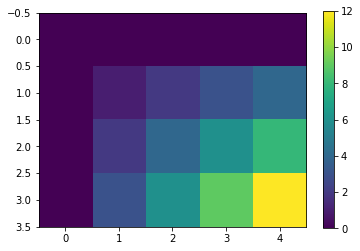

In [15]:
# matplotlib is the core plotting library for python
# pandas plotting and other fancy libraries like seaborn are built on top of matplotlib
#
import matplotlib.pyplot as plt # this is how we get easy access to all of matplotlib's plotting commands
plt.imshow(A) #show the array A as a colored image for the output of A[i*j]
plt.colorbar() #show the color scale for the output of A[i*j]

In [16]:
# numpy has lots of builtin functions that can be applied to arrays

print('the max value in A is',np.max(A)) #this will look through the array and print the maximum value
print('the min value in A is',np.min(A))  #this will look through the array and print the minimum value
print('the mean and standard deviation of the values in A are',np.mean(A), np.std(A)) #this will find the mean value and standard deviation of the array

the max value in A is 12.0
the min value in A is 0.0
the mean and standard deviation of the values in A are 3.0 3.4641016151377544


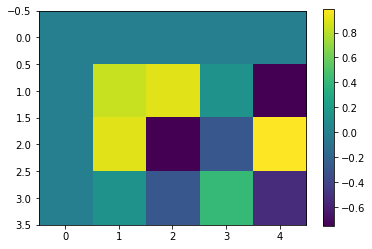

In [32]:
# here we use a builtin numpy routine to take the sine of the entire array A
B = np.sin(A) #this function will take the sine of all the values in the array and store it as a variable called "B"
plt.imshow(B) #show the array B as a colored image
plt.colorbar() #show the color scale for the output of B

## Practice time

In [35]:
# create a 3 (rows) by 5 (columns) numpy array filled with random numbers between 0 and 1
# use the random() method below to get the random numbers
#
# find the mean and standard deviation of the array values
# find the mean of the 1st row (ie row index 0)
# 
import random
random_rows = 3 #specifies number of rows
random_cols = 5 #specifies number of columns
random_num = np.random.random((random_rows,random_cols)) #randomizes numbers between 0 and 1 in each position of array and stores array as a variable called "random_num"


print('A single random number between 0 and 1, uniformly distributed:\n', random_num)
print(f'the mean of the randomly generated array is {np.mean(random_num)} and the standard deviation is {np.std(random_num)}')
print(f'the mean of the first row of the array is {np.mean(random_num[0])}')



A single random number between 0 and 1, uniformly distributed:
 [[0.53927827 0.58467433 0.81016608 0.9977164  0.37547982]
 [0.92800948 0.78613284 0.21467262 0.8794447  0.41052302]
 [0.29897196 0.02390165 0.65743803 0.240216   0.79611561]]
the mean of the randomly generated array is 0.569516053545744 and the standard deviation is 0.2876521343589025
the mean of the first row of the array is 0.6614629793035717


In [47]:
import numpy as np #imports numpy package onto jpynb
import random #imports random package onto jpynb
random_integer_array = np.random.randint(5,10,(4,5)) #generates random integers between 5 and 10, puts it into a four row by 5 column array, and stores it as a variable called "random_integer_array"
print (random_integer_array) #prints randomly generated integer array
print(f'the mean of the randomly generated array is {np.mean(random_integer_array)} and the standard deviation is {np.std(random_integer_array)}')
print(f'the mean of the first row of the array is {np.mean(random_integer_array[0])}')

random_float = random.uniform(5.5, 10.5) #prints a random float between 5.5 and 10.5
random_float_array = np.random.uniform(5.5, 10.5, (3,5)) #generates random integers between 5.5 and 10.5, puts it into a three row by 5 column array, and stores it as a variable called "random_float_array"
print (random_float_array)

[[8 6 5 7 7]
 [7 7 5 9 5]
 [6 9 6 6 8]
 [7 9 9 9 8]]
the mean of the randomly generated array is 7.15 and the standard deviation is 1.388344337691482
the mean of the first row of the array is 6.6
[[ 9.35987579  5.98972437  9.25992465  7.44638203  7.88662605]
 [10.25082549 10.45159203  9.26841391  9.37844204  5.5194017 ]
 [ 5.69797563 10.23708222  6.13349286  7.92616656  6.97666831]]


[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219
  0.96017029  0.75390225 -0.14550003 -0.91113026]


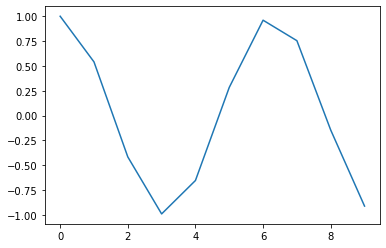

In [63]:
# figure out what each of these four statements is doing. You could insert print() statements to 
# see what A looks like after each.

A = np.zeros((10,2)) #makes a ten row by 2 column array and stores it as a variable called "A"
print (A)

A[:,0] = range(10) #makes a one row array and fills with integers from range 0-9
print (A[:,0])


A[:,1] = np.cos(A[:,0]) #takes the cosine of each value in the (A[:,0]) array
print (A[:,1])

plt.plot(A[:,0], A[:,1]) #plots the cosine values
         
# plot is very configurable
#plt.plot(A[:,0], A[:,1], c='r', marker='o', alpha=0.5)

# On to `pandas`

In [71]:
# this is how we import pandas

import pandas as pd


We will typically get our data by reading from files. `pandas` has a variety of file-reading functions with names like `read_csv` and `read_excel` . Find them all by typing `pd.read_[TAB]`

In [73]:
# Read in Fisher's famous iris dataset, which contains anatomical data on a variety of flowers
# read_csv returns a pandas dataframe
import pandas as pd

iris = pd.read_csv('data/iris_dataset.csv')

print (iris)

FileNotFoundError: [Errno 2] No such file or directory: 'data/iris_dataset.csv'

## Note that this is a "tidy" dataset (as seen in lecture 5)
Each row corresponds to a single sample (in this case, a single flower that was measured). The columns are different measurement types, and a species identifier. The machine learning work flows we will learn about expect data arranged in this form. 


In [70]:
type(iris)

NameError: name 'iris' is not defined

Pandas has two main datatypes. A `DataFrame` like the `iris` object represents multiple columns of data (variables) for multiple rows of observations. A `Series` represents a single column or row of data.

A DataFrame object has an `index` which represents and provides named access to the rows, and a `columns` attribute which represents the columns

In [ ]:
# This index was created automatically when the data was read in. It's just a counter.
# Some datasets might have a natural index such as a date column, an observation identifier, etc.
iris.index

In [ ]:
# these are the columns of the iris dataset
iris.columns


In [ ]:
# here we get a single column, using dictionary-style indexing
# we could also just write iris.sepal_length
#
iris['sepal_length']

In [ ]:
# a single column is of type Series
type(iris['sepal_length'])

In [ ]:
# super-useful function for getting summary statistics on a dataframe
iris.describe()

The `describe` function just returns another `pandas DataFrame`, so we can use it for downstream analysis (more details on plotting below).

In [ ]:
# make a new dataframe object with the results of iris.describe()
df = iris.describe()
print(df)

In [ ]:
# get rid of the "count" row because it screws up the y-scale on the bar plot
# note that df.drop returns a copy, it does not modify df in-place
df = df.drop('count')
print(df)

# now make a bar plot. Lots more on plotting later
df.plot.bar()

## Digression: taking subsets of a dataframe

In [ ]:
# the == expression below creates a column (pd.Series) of True's and False's, with the value in a given
# row being True if the species for that row is 'setosa' and False otherwise
iris['species'] == 'setosa'

In [ ]:
# we can create a new dataframe by indexing into an existing dataframe with this column of True's and False's
iris_subset = iris[ iris['species'] == 'setosa' ]

# here are the stats for just the setosa species flowers
iris_subset.describe()

In [ ]:
# we can loop over all the unique elements in the 'species' column and 
#  get stats for each subset of the dataframe
#
# here we use a python "set" object to remove redundant items (reducing from 150 strings to just 3)
# Background: python sets are special-purpose containers that hold unordered sets of elements. 
# It is much faster to check if an element is in a set than to check if it's in a list. Creating
# a set from a list or other kind of sequence data removes all the duplicates

species_set = set(iris['species'])
print('species_set=', species_set)

for species in species_set:
    print('stats for species', species)
    print(iris[ iris['species'] == species].describe())


## Digression `groupby`
Another handy dataframe method is `groupby` which collects rows based on their value for a given column and returns an object that can be used to access summary stats about those subsets. Here we are using a groupby operation to look at the rows grouped by species.

In [ ]:
# get a table (dataframe) of the mean column values for the different species 
iris.groupby('species').mean()

In [ ]:
# get full stats on the species subsets using the describe() function
iris.groupby('species').describe()

## Saving tabular data and images

DataFrame has `to_csv` and other `to_*` functions (see them using `df.to_<TAB>`) for saving the contents to a file.

In [ ]:
# We can save a dataframe to a file using the to_csv function:
df = iris.groupby('species').mean()
df.to_csv('species_mean_values.csv')

`plt.savefig` saves the most recently plotted figure

In [ ]:
# for non-numeric columns we can count the number of times each value appears using value_counts():
df = iris['species'].value_counts()
print(df)

# this is kind of silly
df.plot.bar()

# this saves the silly bar plot to a pngfile named silly_bar.png
plt.savefig('silly_bar.png')

# plotting with pandas
Pandas has all sorts of built-in plotting routines. If `dataframe` is a pandas `DataFrame`, `dataframe.plot.TAB` will tab complete to a list of plotting functions.

Pandas plotting is built on top of `matplotlib`, so plotting functions typically return `matplotlib` objects and `matplotlib.pyplot` commands can be used to tweak features of the plots just as when using plain-vanilla matplotlib. 

See the pandas visualization page:
https://pandas.pydata.org/pandas-docs/stable/visualization.html


The dataframe object has a couple plotting methods: `plot` and `hist` and maybe one or two others

In [ ]:
iris.plot()

In [ ]:
iris.hist()

Many more plotting methods are available in `dataframe.plot.*`, which you can browse using tab completion 

In [ ]:
#iris.plot.<TAB>

In [ ]:
iris.plot.hist(figsize=(8,6),alpha=0.5)

Maybe a histogram isn't the best visualization, how about kernel density estimation, which produces smoothed density plots?

In [ ]:
iris.plot.density(figsize=(8,6))

Scatter plots of one column against another are easy enough:

In [ ]:
iris.plot.scatter( x='sepal_length', y='sepal_width', figsize=(8,6) )

## Practice time

In [ ]:
# Create a hexbin plot of petal_length versus petal_width
# Try out different gridsizes
# Compare the output to a scatterplot of petal_length versus petal_width
# hexbin is one of the builtin plotting functions: iris.plot.hexbin?
#



In [ ]:
# What does this plot represent? 
# You could first try typing iris.mean() to see what that dataframe looks like...

iris.mean().plot.pie()

### But what about the `species` structure in this dataset?

Let's add some color. This is super-easy to do using the plotting routines in the `seaborn` package, but for right now we'll stick with `pandas` and `matplotlib`.

Definitely check out the [seaborn gallery](https://seaborn.pydata.org/examples/index.html), though.



In [ ]:
# Here we are going to set up a dictionary that maps from iris species to plotting colors
color_dict = {'virginica': 'blue', 'versicolor': 'orange', 'setosa': 'green'}

# now let's use this dictionary to make a new column for the iris dataframe, containing the colors
colors = []
for species in iris['species']:
    colors.append(color_dict[species])

print(colors[:5])

# or colors = [color_dict[s] for s in iris['species']] # list comprehension


This is how we add a column to a dataframe:

In [ ]:
iris['color'] = colors 

#or iris['color'] = iris['species'].map(color_dict)

In [ ]:
# confirm the new column:
iris.head()

In [ ]:
# Now we can see the different flower species
#
iris.plot.scatter( x='sepal_length', y='sepal_width', c='color')

In [ ]:
# this is a nice way of comparing the values in different columns of a DataFrame
pd.plotting.scatter_matrix(iris, diagonal='kde', figsize=(12,12), c=iris['color']);

## Digression: list comprehensions

In [ ]:
# quick introduction to list comprehensions:
evens = [ 2*x for x in range(10)]
print('evens one way:', evens)

evens = [ x for x in range(20) if x%2 == 0]
print('evens another way:', evens)

## Digression: seaborn
As mentioned above, seaborn is a nice high-level plotting library that is built on top of matplotlib. 
Seaborn understands pandas dataframes and tidy data and can make generating complex
visualizations really easy.


In [ ]:
import seaborn as sns

# it identifies the numeric columns, picks a nice color palette, adds nice density plots
# along the diagonal and a nice legend
sns.pairplot(iris, hue='species')

## Practice time
Read the data in the csv file `data/vdj.csv` into a pandas dataframe using `pd.read_csv` like we did for the iris dataset. How many columns are there? How many numeric columns? Make a scatter plot of 'reads' versus 'umis'. Count how many times each of the different gene names occurs in the `v_gene` column using the `.value_counts()` method. Can you make a bar plot or pie chart of those numbers (like we did for the species numbers above?).

In [ ]:
# start by reading the data into a dataframe. 
#df = pd.read_csv(...)

# .head() is a nice way to get a peak at a dataset
df.head()

# Machine learning with the `scikit-learn` package

borrowing heavily from "The Python Data Science Handbook" by Jake VanderPlas

https://jakevdp.github.io/PythonDataScienceHandbook/

## categories of machine learning
Broadly speaking, machine learning for data science can be broken down into **supervised** and **unsupervised** methods. 

In **supervised** machine learning, we have a set of labeled training data, and we'd like to train a classifier or predictor in order to make predictions on some new set of testing data. We may be trying to predict something discrete, like different categories of data (for example, biological species from flower dimensions in the iris dataset; this is called *classification*), or predicting something continuous-valued like a response variable as a function of predictor variable(s) (this is called *regression*). 

In **unsupervised** machine learning, we are trying to discover hidden structure in a dataset. Two broad approaches are *clustering*, where we look for subgroups of similar data points, and *dimensionality reduction*, where we project a high-dimensional dataset into a lower-dimensional space while trying to preserve important features of the data points (e.g., keeping points that were nearby in the high-dimensional space also nearby in the low-dimensional projection)  

`scikit-learn` has a nice flow-chart with even more information:

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

![logo](https://scikit-learn.org/stable/_static/ml_map.png)


## Unsupervised dimensionality reduction on the iris dataset with PCA

`scikit-learn` has several methods for dimensionality reduction. One popular method is principal components analysis (PCA). 

Quoting from [the wikipedia entry for PCA](https://en.wikipedia.org/wiki/Principal_component_analysis), "Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components"

This image shows a 2-D dataset with vectors indicating the directions of the first two principal components:

![logo](https://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg)

To apply PCA to the iris dataset, we need to create an array with just the numeric features we'll be using. 

In [ ]:
iris.head()

In [ ]:
# create a features array with just the measurement data

X_iris = iris.drop(columns=['species','color'])
X_iris.shape

In [ ]:
X_iris.head()


## A standard scikit-learn workflow

### Step 1. create and configure the model (here `PCA`)

### Step 2. `fit` the model to the data

### Step 3. `transform` the data using the model. 
For classification and clustering, where we have discrete labels, this third step is typically called `predict`, as we'll see below for K means clustering.

In [ ]:
from sklearn.decomposition import PCA # sklearn == scikit-learn package name

# This is the general scikit-learn workflow
# Step 1. create and configure the model:
pca = PCA(n_components=4)

# Step 2. fit the model to the data
pca.fit(X_iris)

Here are the four principal component vectors. They can be thought as vectors of weights, one weight for each of the columns in the original feature matrix, with the magnitude of each weight reflecting the contribution of that feature (e.g., petal_width) to the component. The first component gives the direction in feature space along which the greatest variation exists in the dataset.

In [ ]:
print(pca.components_)

In [ ]:
# The principal components are all unit (length 1) vectors and they are 
#  orthogonal (perpendicular) to one another. Here we test that a bit.
#

print('The length of the first principal component is',np.linalg.norm(pca.components_[0]))
print('The dot product of the first and second principal components is',
    np.dot( pca.components_[0], pca.components_[1] ))


In [ ]:
print('The fraction of the total variance explained by each component is:', pca.explained_variance_ratio_)
print('The total explained variance is :', np.sum(pca.explained_variance_ratio_))


### Step 3. Now we can `transform` the data using the fitted model.

In [ ]:
# Step 3. Apply the model to 'transform' the data, in this case by mapping
#    the input feature matrix onto the principal components
#

X_pca = pca.transform(X_iris)
X_pca.shape


In [ ]:
# Now the first two columns of X_pca represent the axes of 
#  greatest variation, so we can plot just those and retain
#  the maximum information.

plt.scatter( X_pca[:,0], X_pca[:,1], c=colors )
plt.title('First two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2'); # add ; so notebook doesn't print the Text object returned by plt.ylabel


### Digression on rescaling the data

This seems to work pretty well, but in some situations the multidimensional variables we are measuring are not directly comparable (for example because they have different units), in which case PCA will be dominated by the features that have the largest raw standard deviation. We can correct for this by first normalizing all columns to have mean 0 and standard deviation 1, using one of `scikit-learn`'s many preprocessing routines: 

In [ ]:
# compare the standard deviations of the different features. 
#  They aren't too far apart...
#
X_iris.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: create the sklearn object
scaler = StandardScaler()
scaler

In [ ]:
# Step 2: fit the model (in this case, that means estimating the mean and variance)
scaler.fit( X_iris )
print('mean:', scaler.mean_)
print('variance:', scaler.var_)


In [ ]:
# Step 3: apply the fitted model to transform the data (in this case,
#  that means subtract the mean and divide by the standard deviation)
X_iris_scaled = scaler.transform( X_iris )

# check the mean, std-dev of the first column
print( np.mean( X_iris_scaled[:,0]), np.std( X_iris_scaled[:,0]))

In [ ]:
# Step 1: create PCA model
pca2 = PCA(n_components=4)

# Step 2: solve for PCs
pca2.fit(X_iris_scaled)

# Step 3: transform the data to the new PC coordinate system
X_pca2 = pca2.transform( X_iris_scaled )

In [ ]:
# set a larger figure size
plt.figure(figsize=(14,8))

# create a multi-panel plot:
nrows=1 # one row,
ncols=2 #  two columns

plt.subplot(nrows, ncols, 1)
plt.scatter( X_pca[:,0], X_pca[:,1], c=colors)
plt.title('raw')
plt.xlabel('PCA1', fontsize=6)
plt.ylabel('PCA2')

plt.subplot(nrows, ncols, 2)
plt.scatter( X_pca2[:,0], X_pca2[:,1], c=colors)
plt.title('scaled')
plt.xlabel('PCA1')


print('old explained variance:',pca.explained_variance_ratio_)
print('old components:',pca.components_)
print('new explained variance:',pca2.explained_variance_ratio_)
print('new components:',pca2.components_)

## Unsupervised clustering on the iris dataset using K-means clustering

K-means is an iterative clustering approach in which we repeatedly (1) choose K cluster centroids, (2) assign each data point to the closest centroid, and (3) update the centroids to reflect the means of the new clusters. The starting cluster centroids are chosen randomly (hence the use of `random_state=10` below to get reproducible results). Here's a snapshot from the [wikipedia page for K-means clustering]( https://en.wikipedia.org/wiki/K-means_clustering).

![logo](kmeans.png)

The naming convention I'm following here is to call the input (2-D) data `X` and the (1-D) classification/clusters `y`. This loosely follows the math-y convention where `x` is the independent variable and `y` is the dependent variable: `y=f(x)` 


In [ ]:
from sklearn.cluster import KMeans

# STEP 1: create and configure the model
# create the classifier object, tell it we are looking for 3 clusters
#  and set the random_state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=10)

# STEP 2: fit the model on the data, using "model.fit"
# learn the cluster assignments
kmeans.fit(X_iris)

# STEP 3: apply the model to the data, using "model.predict"
# create a new array with the cluster assignments, represented by the integers 0, 1, and 2.
y_kmeans = kmeans.predict(X_iris)
y_kmeans

In [ ]:
# compare the species/colors array to the kmeans cluster assignments
np.array(colors) # converting to a numpy array gives a more compact view

In [ ]:
# Here we convert the kmeans clusters into colors so we can compare them with
#  the species colors we set up earlier. Looking at the two arrays printed 
#  above, we can see a rough correspondence between kmeans cluster # and
#  species color
#
#  cluster   color
#    0         green
#    1         orange
#    2         blue

# use a dictionary to store this mapping
cluster_to_color = {0:'green', 1:'orange', 2:'blue'}

kmeans_colors = []

for cluster in y_kmeans:
    kmeans_colors.append(cluster_to_color[cluster])
    
    
error_colors = []
for color, kmeans_color in zip( colors, kmeans_colors ):
    if color == kmeans_color:
        # correct cluster assignment
        error_colors.append('b')
    else:
        # incorrect cluster assignment
        error_colors.append('r')
print('error_colors:', error_colors)

In [ ]:
# put three plots side-by-side
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter( X_pca[:,0], X_pca[:,1], c=colors)
plt.title('species colors')

plt.subplot(1,3,2)
# a more succinct way to set up kmeans_colors using a list comprehension
#kmeans_colors = [ 'bgr'[x] for x in y_kmeans]
plt.scatter( X_pca[:,0], X_pca[:,1], c=kmeans_colors)
plt.title('kmeans cluster colors')

plt.subplot(1,3,3)
# a more succinct way to set up error_colors using a list comprehension, zip, and conditional assignment
#error_colors = [ ('red' if x!=y else 'blue') for x,y in zip( colors, kmeans_colors) ]
plt.scatter( X_pca[:,0], X_pca[:,1], c=error_colors, alpha=0.5)
plt.title('species/cluster agreement\nblue=match, red=mismatch'); # semicolon so it doesn't print out Text

## Supervised classification on the iris dataset using Gaussian naive bayes classifier. 

A very simple approach to classification is to assume that the feature values for each class are drawn independently of one another from one dimensional gaussian distributions (bell-shaped curves), and to choose the predicted class labels that maximize the likelihood of the observed feature values. The Gaussian naive bayes classifier implements this method. Fitting the model involves estimating, for each feature (like sepal width) and each class (like 'setosa'), the mean and standard deviation of the feature distribution over the class members.

For further details check out the [wikipedia page](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes).

In [ ]:
## we need an array with the categories we are trying to classify:
y_iris = iris['species']
print(y_iris.head())
y_iris.shape

In [ ]:
## choose the model
from sklearn.naive_bayes import GaussianNB

## create (and optionally configure) the model
model = GaussianNB()

## train the model
model.fit(X_iris, y_iris)

## see how well we do:
y_model = model.predict(X_iris)
y_model

Now we can see how well we did:

In [ ]:
from sklearn.metrics import accuracy_score
print('The fraction of correctly classified samples is',accuracy_score(y_iris, y_model))

In [ ]:
# or we can do this "by hand"
num_correct = 0

# note that the python "zip" function works here even though y_model is a numpy array 
#  and y_iris is a pandas Series 
for prediction, correct_answer in zip(y_model, y_iris):
    if prediction == correct_answer:
        num_correct += 1
        
print(num_correct/len(y_iris))


### What's the problem with the above analysis?
We trained and tested on the same set.

In [ ]:
## redo, correctly

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=30)

# create the model
model2 = GaussianNB()

# train the model
model2.fit(Xtrain, ytrain)

# predict on NEW DATA that wasn't used for training
y_model = model2.predict(Xtest)

# assess accuracy
accuracy_score(ytest, y_model)


## Linear regression using scikit-learn

In linear regression we model a continuous-valued response variable as a linear combination of predictor variables. The parameters we need to fit are the coefficients for each predictor variable (the *slope* in the 1-D case), and if desired a constant offset (the *intercept*).

Let's start by making some slightly noisy data using a linear function:

In [ ]:
slope = 2.
intercept = -1

noise_factor = 0.1

num_points = 50

# create uniformly distributed x-values between 0 and 1
x = np.random.rand( num_points)
print(x)

# now create y values that are a linear function of the x-values, with some random noise added in
# see how easy it is to multiply and add entire arrays of data with numpy
# 
y = slope * x - intercept + noise_factor * np.random.randn(50)

plt.scatter(x, y);

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model

A slightly tricky point is that scikit-learn routines generally expect a two-dimensional data array with one row for each observation (datapoint) and columns for each of the data values. Our set of x-values is actually a one-dimensional array (basically a list). So we need to change it's shape to make it two-dimensional, using the "reshape" command: 

In [ ]:
print("old 1D shape:",x.shape)
X = x.reshape( (num_points,1)) # note: upper-case X
print("new 2D shape:", X.shape)

In [ ]:
# now we can fit the model to the data:
model.fit(X, y)


In [ ]:
# this is the slope value we recovered from the model: not too far from the actual value!
model.coef_

In [ ]:
# and this is the intercept:
model.intercept_

We can plot the fitted line:

In [ ]:
# create a linear array of new test points
xfit = np.linspace(0,1,10)

# reshape into a 10-rows by 1-column 2D array to make scikit-learn happy
Xfit = xfit.reshape((10,1))

# predict the y-values using our fitted model:
yfit = model.predict(Xfit)

# scatter plot of original data 
plt.scatter(x, y)

# line plot of fitted line
plt.plot(xfit, yfit, c='r');

# Random junk below here, probably unused

In [ ]:
# another useful way of creating an array is to use the numpy random module
# here we create an array of normally distributed values
nrows = 10
ncols = 10
A = np.random.randn(nrows,ncols)
print(A)
plt.imshow(A)
plt.colorbar()


In [ ]:
import math # import the math module
nrows = 1000
ncols = 1000
A = np.random.randn(nrows,ncols)

In [ ]:
%%timeit
B = np.sin(A)

In [ ]:
%%timeit
B = np.zeros((nrows,ncols))
for i in range(nrows):
    for j in range(ncols):
        B[i,j] = math.sin( A[i,j])

In [ ]:
# do this so the plots appear inline in the notebook:

%matplotlib inline

In [ ]:
iris.sort_index(axis=1).head()

In [ ]:
iris.head()

In [ ]:
iris.sort_values('petal_width',axis=0)

Sorting: note that the default in most pandas operations is to return *copies* not to change the existing dataframe. This can usually be changed by passing inplace=True as one of the arguments. 

In [ ]:
iris.groupby('species').mean()



In [ ]:
#X_normed = X_iris.transform(lambda x: (x - x.mean()) / x.std())
